In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
x1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
x1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
x1.shape

(1599, 12)

In [7]:
x1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
x1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


in 'residual sugar', 'free sulfur dioxide' and 'total sulfur dioxide' may be outlier present.

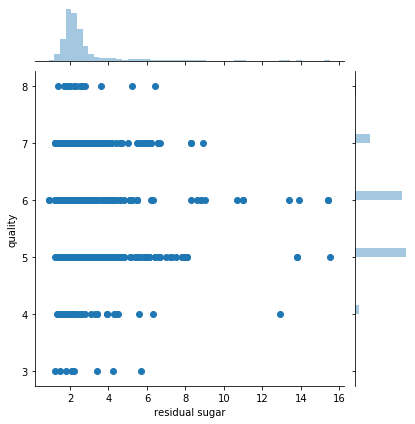

In [10]:
sns.jointplot(x='residual sugar', y='quality', data=x1)

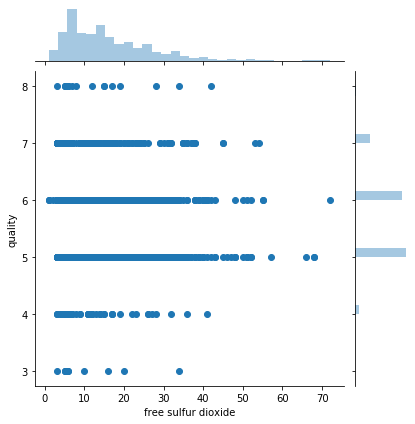

In [11]:
sns.jointplot(x= 'free sulfur dioxide', y='quality', data=x1)

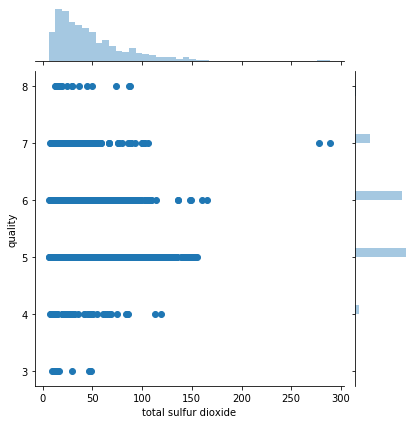

In [12]:
sns.jointplot(x='total sulfur dioxide', y='quality', data=x1)

In [13]:
UpperLimit = np.percentile(x1['total sulfur dioxide'], [99])[0]
UpperLimit

145.0

In [14]:
x1[(x1['total sulfur dioxide'] > UpperLimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [15]:
x1[(x1['total sulfur dioxide'] > UpperLimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [16]:
x1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


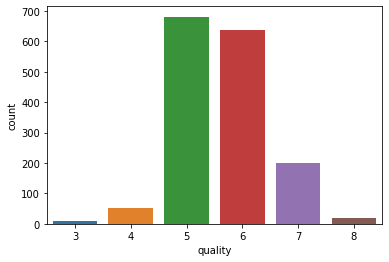

In [17]:
sns.countplot(x = 'quality', data=x1)

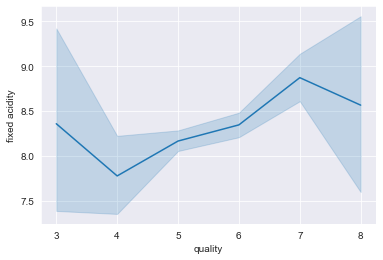

In [18]:
sns.set_style('darkgrid')
sns.lineplot(data=x1, x="quality", y="fixed acidity")

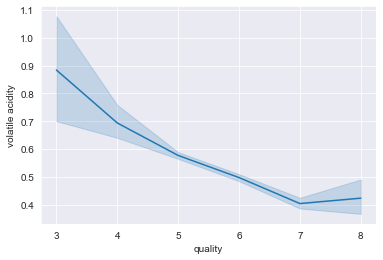

In [19]:
sns.set_style('darkgrid')
sns.lineplot(data=x1, x="quality", y="volatile acidity")

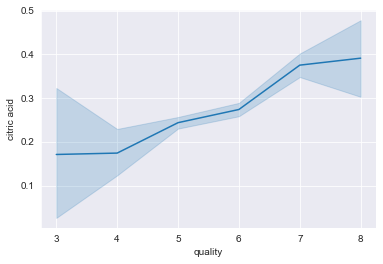

In [20]:
sns.set_style('darkgrid')
sns.lineplot(data=x1, x="quality", y="citric acid")

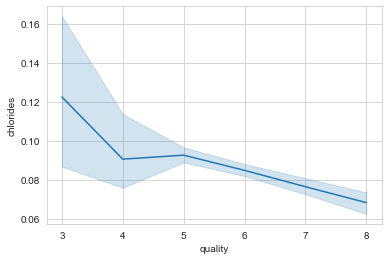

In [21]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="chlorides")

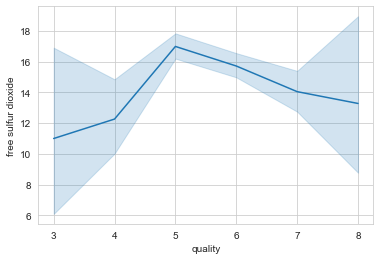

In [22]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="free sulfur dioxide")

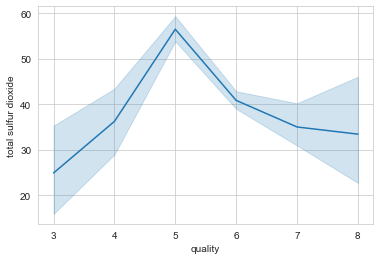

In [23]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="total sulfur dioxide")

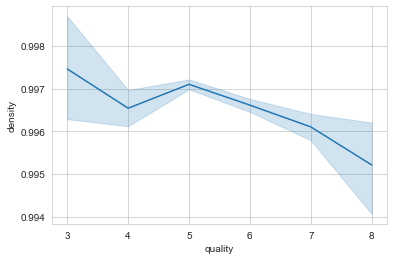

In [24]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="density")

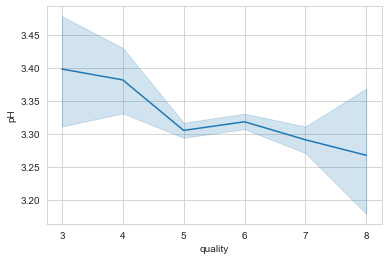

In [25]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="pH")

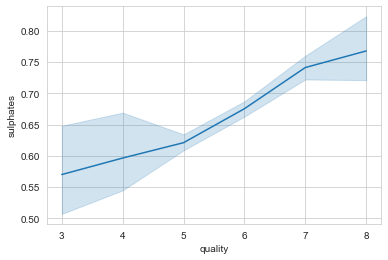

In [26]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="sulphates")

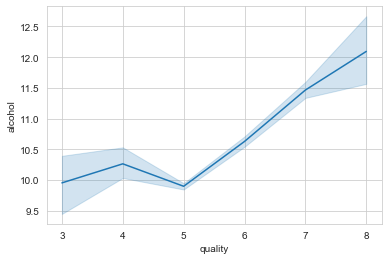

In [27]:
sns.set_style('whitegrid')
sns.lineplot(data=x1, x="quality", y="alcohol")

In [28]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
x1['quality'] = pd.cut(x1['quality'], bins = bins, labels = group_names)

In [29]:
x1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


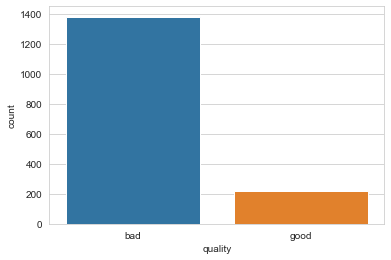

In [30]:
sns.countplot(x = 'quality', data=x1)

In [31]:
labelencoder = LabelEncoder()

In [32]:
x1['quality'] = labelencoder.fit_transform(x1['quality'])

In [33]:
x1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


NOW DIVIDING THE DATA SET IN TWO PARTS

In [34]:
target = 'quality'
x = x1.drop(['quality'], axis=1)
y = x1[target]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LogisticRegression = LogisticRegression(C=0.7)

In [39]:
LogisticRegression.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Acuracy of logistic regression for test set:  86.5625
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320

Confusion Matrix : 
 [[267   6]
 [ 37  10]]

Confusion Matrix heatmap : 


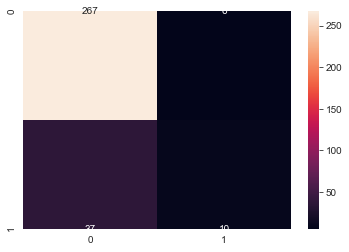

In [40]:
print("Acuracy of logistic regression for test set: ", accuracy_score(y_test, LogisticRegression.predict(x_test))*100)
print('Classification Report : \n', classification_report(y_test, LogisticRegression.predict(x_test)))
print("Confusion Matrix : \n", confusion_matrix(y_test, LogisticRegression.predict(x_test)))
print('\nConfusion Matrix heatmap : ')
sns.heatmap(confusion_matrix(y_test, LogisticRegression.predict(x_test)), annot=True, fmt='d')

Acuracy of SVM classifier for train set:  88.27208756841283

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94      1109
           1       0.66      0.25      0.36       170

    accuracy                           0.88      1279
   macro avg       0.78      0.61      0.65      1279
weighted avg       0.86      0.88      0.86      1279


Confusion Matrix for train set : 
 [[1087   22]
 [ 128   42]]

Confusion Matrix Heatamp for train set: 


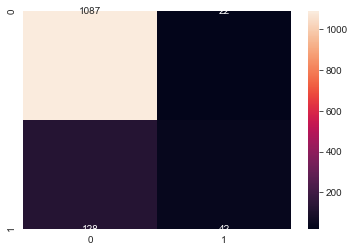

In [41]:
print("Acuracy of SVM classifier for train set: ", accuracy_score(y_train, LogisticRegression.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, LogisticRegression.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, LogisticRegression.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, LogisticRegression.predict(x_train)), annot=True, fmt='d')

K-NEAREST NEIGHBORS

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
neighbors = [i for i in range(1,21)]

In [44]:
accuracy=[]
for k in neighbors:    
    Knn_classifier = KNeighborsClassifier(n_neighbors=k)
    Knn_classifier.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, Knn_classifier.predict(x_test))*100)

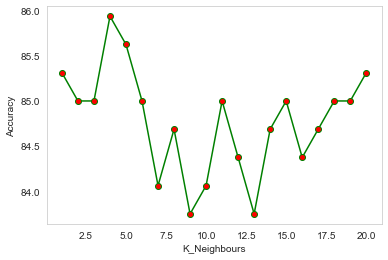

In [45]:
plt.plot(neighbors, accuracy, color='green',linestyle='-', marker='o', markerfacecolor='red')    
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()

In [46]:
Knn_classifier = KNeighborsClassifier(n_neighbors=4)
Knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Acuracy of KNN classifier for test set:  85.9375

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       273
           1       0.60      0.13      0.21        47

    accuracy                           0.86       320
   macro avg       0.73      0.56      0.57       320
weighted avg       0.83      0.86      0.82       320


Confusion Matrix for test case : 
 [[269   4]
 [ 41   6]]

Confusion Matrix Heatamp for test case: 


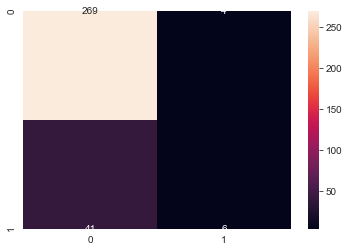

In [47]:
print("\nAcuracy of KNN classifier for test set: ", accuracy_score(y_test, Knn_classifier.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, Knn_classifier.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, Knn_classifier.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, Knn_classifier.predict(x_test)), annot=True, fmt='d')

Acuracy of KNN classifier for train set:  90.61767005473025

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1109
           1       0.90      0.33      0.48       170

    accuracy                           0.91      1279
   macro avg       0.90      0.66      0.72      1279
weighted avg       0.91      0.91      0.89      1279


Confusion Matrix for train set : 
 [[1103    6]
 [ 114   56]]

Confusion Matrix Heatamp for train set: 


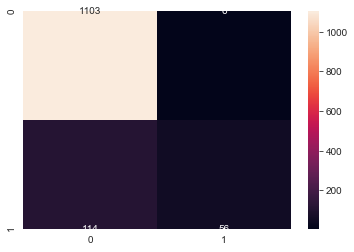

In [48]:
print("Acuracy of KNN classifier for train set: ", accuracy_score(y_train, Knn_classifier.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, Knn_classifier.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, Knn_classifier.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, Knn_classifier.predict(x_train)), annot=True, fmt='d')

RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Acuracy of random forest for test set:  90.0

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320


Confusion Matrix for test case : 
 [[264   9]
 [ 23  24]]

Confusion Matrix Heatamp for test case: 


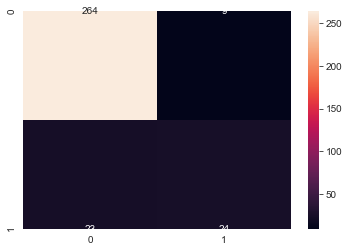

In [50]:
print("\nAcuracy of random forest for test set: ", accuracy_score(y_test, rfc.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, rfc.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, rfc.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, rfc.predict(x_test)), annot=True, fmt='d')


Acuracy of random forest for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix for train case : 
 [[1109    0]
 [   0  170]]

Confusion Matrix Heatamp for train case: 


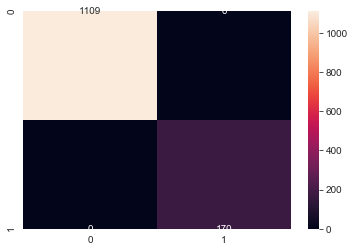

In [51]:
print("\nAcuracy of random forest for train set: ", accuracy_score(y_train, rfc.predict(x_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, rfc.predict(x_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, rfc.predict(x_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, rfc.predict(x_train)), annot=True, fmt='d')

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Acuracy of Decision tree for test set:  87.1875

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.53      0.55        47

    accuracy                           0.87       320
   macro avg       0.74      0.73      0.74       320
weighted avg       0.87      0.87      0.87       320


Confusion Matrix for test case : 
 [[254  19]
 [ 22  25]]

Confusion Matrix Heatamp for test case: 


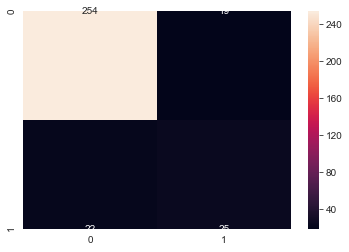

In [53]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, classifier_dt.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, classifier_dt.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, classifier_dt.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, classifier_dt.predict(x_test)), annot=True, fmt='d')


Acuracy of Decision tree for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix for train case : 
 [[1109    0]
 [   0  170]]

Confusion Matrix Heatamp for train case: 


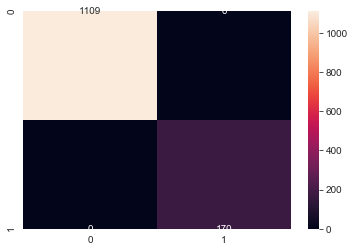

In [54]:
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, classifier_dt.predict(x_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, classifier_dt.predict(x_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, classifier_dt.predict(x_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, classifier_dt.predict(x_train)), annot=True, fmt='d')

In [55]:
test_accuracy = [accuracy_score(y_test, LogisticRegression.predict(x_test))*100,
                accuracy_score(y_test, Knn_classifier.predict(x_test))*100,
                accuracy_score(y_test, rfc.predict(x_test))*100,
                accuracy_score(y_test, classifier_dt.predict(x_test))*100]  


train_accuracy =[accuracy_score(y_train, LogisticRegression.predict(x_train))*100,
                 accuracy_score(y_train, Knn_classifier.predict(x_train))*100,
                 accuracy_score(y_train, rfc.predict(x_train))*100,
                 accuracy_score(y_train, classifier_dt.predict(x_train))*100]

In [56]:
Classifier = [ 'LogisticRegression', 'KNN Classifier', 'Random forest', 'desicion tree']

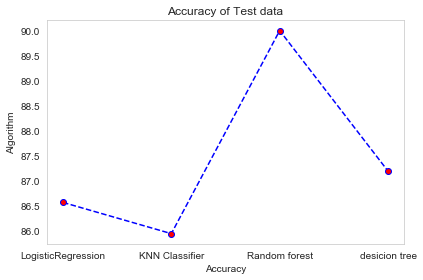

In [57]:
plt.plot(Classifier, test_accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy')
plt.title('Accuracy of Test data')
plt.grid()
plt.tight_layout()

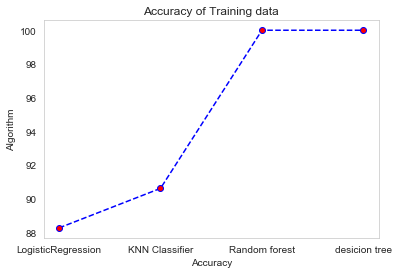

In [58]:
plt.plot(Classifier, train_accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy')
plt.title('Accuracy of Training data')
plt.grid()

In [59]:
print('Accuracy for Test Data : \n')
for i in range(4):
    print(Classifier[i], ':', test_accuracy[i])

Accuracy for Test Data : 

LogisticRegression : 86.5625
KNN Classifier : 85.9375
Random forest : 90.0
desicion tree : 87.1875


In [60]:
print('Accuracy for Traing Data : \n')
for i in range(4):
    print(Classifier[i], ':', train_accuracy[i])

Accuracy for Traing Data : 

LogisticRegression : 88.27208756841283
KNN Classifier : 90.61767005473025
Random forest : 100.0
desicion tree : 100.0


by above random forest and Decission Tree Classifier gives 100 percent accuracy to the model.